In [845]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import warnings
warnings.filterwarnings('ignore')

https://www.programcreek.com/python/example/86074/sklearn.ensemble.RandomForestRegressor

In [846]:
df = pd.read_csv('./data/final_0507.csv')

In [847]:
#df = df[63:]

In [848]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
#df.set_index('Date', inplace=True)
# df['TARGET'] = df['TARGET'].diff()
# df['TARGET'].iloc[0] = 0

In [849]:
# for i in ['EURO_conf','CHINA_conf','ASIA_conf','AMERICA_conf']:
#     tmp = "{}".format(i)
#     df[tmp] = df[tmp].diff()
#     df[tmp].iloc[0] = 0

In [850]:
cols = list(df.columns)
cols.remove('Date')

In [851]:
df[cols] = df[cols].astype(int)

In [852]:
df.head()

,Date,MM_conf,LA_conf,NL_conf,PH_conf,RU_conf,KR,TW_conf,US_conf,AE_conf,...,DE_roam,JP_roam,TH_roam,VN_roam,US_roam,CN_roam,news,covid_tr,coro_tr,target
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,450,2717,1382,2592,701,2453,430,0,1,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,476,2520,1259,2338,943,2188,452,0,5,0
2,2020-01-24,0,0,0,0,0,1,2,1,0,...,564,2448,1069,2251,864,1698,421,0,5,1
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,395,2542,1031,2336,828,1403,506,0,7,0
4,2020-01-26,0,0,0,0,0,1,1,3,0,...,377,4823,1477,2695,900,2508,552,0,8,1


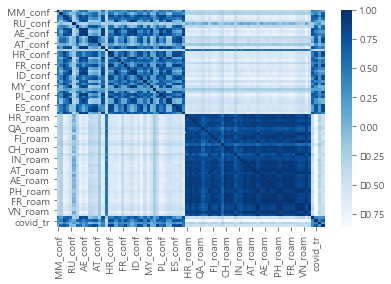

In [853]:
sns.heatmap(df.corr(), cmap='Blues')

In [854]:
df.Date = pd.to_datetime(df.Date)
df['dayofweek'] = df['Date'].dt.dayofweek
df.set_index('Date', inplace=True)

In [855]:
plt.style.use('ggplot')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020C727C4048>,
      dtype=object)

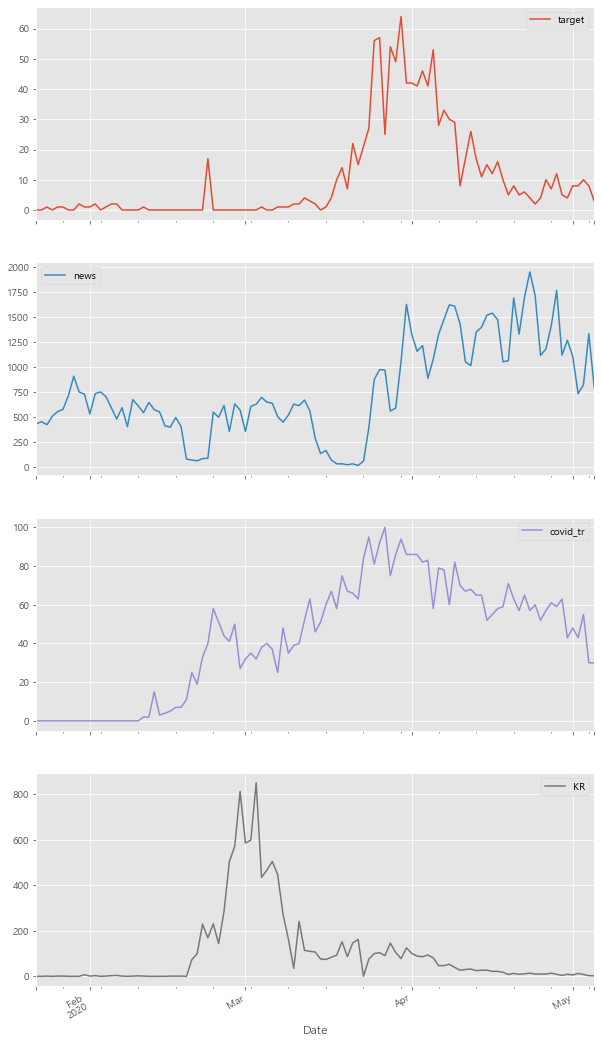

In [856]:
df[['target','news','covid_tr','KR']].plot(subplots=True, figsize=(10,20))

## lag 변수 생성

In [857]:
lag_amount = 3

for i in range(lag_amount):
    df['lag{}'.format(i+1)] = df['target'].shift(i+1)
    
df.dropna(inplace=True)

In [858]:
df.head()

,MM_conf,LA_conf,NL_conf,PH_conf,RU_conf,KR,TW_conf,US_conf,AE_conf,GB_conf,...,US_roam,CN_roam,news,covid_tr,coro_tr,target,dayofweek,lag1,lag2,lag3
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,828,1403,506,0,7,0,5,1.0,0.0,0.0
2020-01-26,0,0,0,0,0,1,1,3,0,0,...,900,2508,552,0,8,1,6,0.0,1.0,0.0
2020-01-27,0,0,0,0,0,1,1,0,0,0,...,1130,3133,576,0,13,1,0,1.0,0.0,1.0
2020-01-28,0,0,0,0,0,0,3,0,0,0,...,1009,2150,711,0,17,0,1,1.0,1.0,0.0
2020-01-29,0,0,0,0,0,0,0,0,4,0,...,829,1966,906,0,12,0,2,0.0,1.0,1.0


## Feature Selection

In [859]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [894]:
X_cols = list(df.columns)
X_cols.remove('target')

X_cols.remove('NZ_conf')
X_cols.remove('lag1')
X_cols.remove('DE_conf')

In [895]:
# X변수들과 y변수 구분
X = df[X_cols]
y = df['target']

In [868]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [823]:
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split' : [5, 6, 7, 8],
    'max_depth' : [4,5,6,7,8],
}

In [740]:
# grid search
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [741]:
CV_rfc

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [742]:
CV_rfc.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [743]:
CV_rfc.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 100}

In [896]:
# parameter 설정후에 다시 진행
rf = RandomForestRegressor(n_estimators=100, max_depth=5,max_features='auto', min_samples_split=5)
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [897]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = list(X.columns)
df_importance['Importance'] = rf.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
82,lag3,0.131
36,TH_conf,0.118
78,covid_tr,0.104
16,HR_conf,0.092
17,CZ_conf,0.081
...,...,...
42,QA_roam,0.000
50,CH_roam,0.000
57,CA_roam,0.000
38,HR_roam,0.000


In [900]:
df_importance.head(30)

,Feature,Importance
82,lag3,0.131285
36,TH_conf,0.117699
78,covid_tr,0.103878
16,HR_conf,0.092372
17,CZ_conf,0.080810
81,lag2,0.073731
35,CH_conf,0.056685
34,ES_conf,0.054646
11,AU_conf,0.049868
27,MY_conf,0.045259


In [877]:
#df_importance.to_csv('feature_importance.csv')

Text(0, 0.5, '변수')

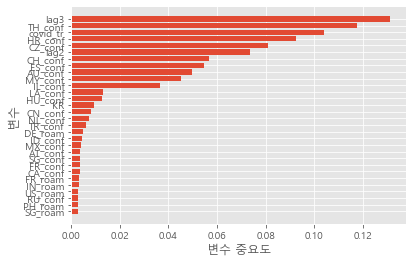

In [901]:
# 설명변수 중요도 그래
# 중요도가 높은 변수를 상위에 그림
# 상위 10개 확인
df_importance1 = df_importance.head(30)
df_importance1.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance1))
plt.barh(y = coordinates,
        width = df_importance1['Importance'])
plt.yticks(coordinates, df_importance1['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

# Prediction

In [902]:
new_x_cols = list(df_importance1['Feature'])

In [903]:
#new_x_cols.remove('NZ_conf')

In [904]:
X_cols = list(df.columns)
X_cols.remove('target')


# 테스트 데이터 수
test_data_size = 14
# X변수들과 y변수 구분

# # 앞의 40개는 지우기
# X = df[40:][new_x_cols]
# y = df[40:]['target']

X = df[X_cols]
y = df['target']

In [905]:
# Train, Test set split
X_train, X_test = X[:-test_data_size], X[-test_data_size:]
y_train, y_test = y[:-test_data_size], y[-test_data_size:]

In [906]:
from sklearn.ensemble.forest import RandomForestRegressor

In [984]:
# build our RF model
RF_Model = RandomForestRegressor(n_estimators=110, max_features='auto', min_samples_split=8, min_samples_leaf=2, oob_score=True)

# let's get the labels and features in order to run our 
# model fitting
labels = y_train
features = X_train

# Fit the RF model with features and labels.
rgr=RF_Model.fit(features, labels)

In [985]:
# Now that we've run our models and fit it, let's create
# dataframes to look at the results
X_test_predict=pd.DataFrame(
    rgr.predict(X_test)).rename(
    columns={0:'predict'})
X_train_predict=pd.DataFrame(
    rgr.predict(X_train)).rename(
    columns={0:'predict'})

# combine the training and testing dataframes to visualize
# and compare.
RF_predict = X_train_predict.append(X_test_predict)

In [986]:
rgr.predict(X_test)

array([11.39166929, 11.88099174,  9.81602935,  8.74226549,  8.27156399,
        8.05862668,  8.04865622,  8.54391366,  8.10439379,  8.26854438,
        7.98746685,  8.37911351,  8.29870539,  7.99002096])

In [987]:
RF_predict.set_index(pd.to_datetime(df.index, format='%Y%m%d'), inplace=True)

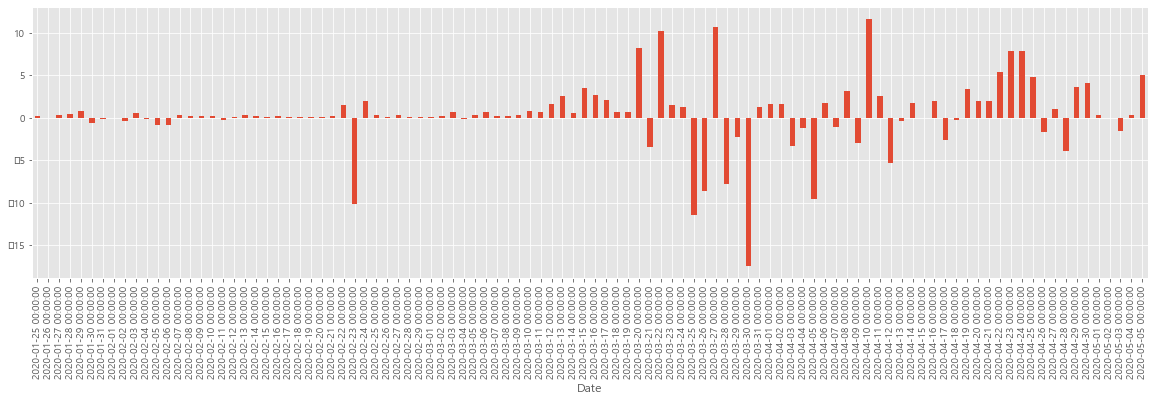

In [988]:
plt.figure(figsize=(20,5))
RF_predict['diff']=RF_predict.predict - df.target
RF_predict['diff'].plot(kind='bar')

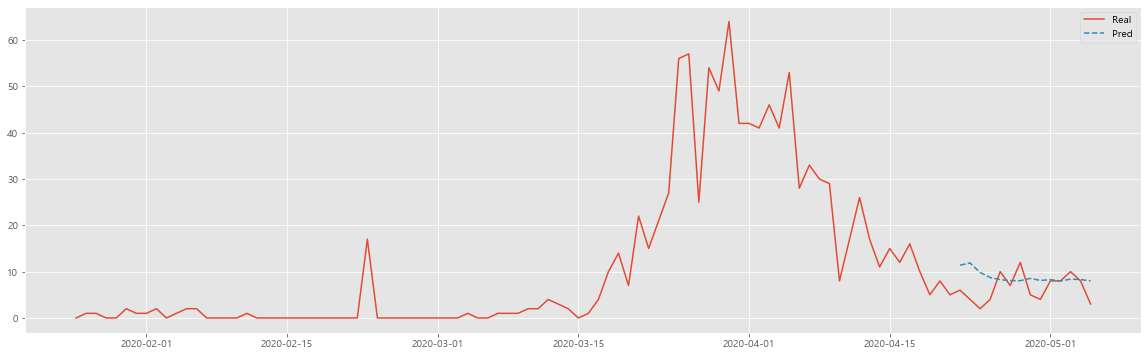

In [989]:
plt.figure(figsize=(20,6))
plt.plot(df['target'], label='Real')
plt.plot(RF_predict['predict'][-len(X_test):], '--',label='Pred', )
plt.legend()

In [990]:
rgr.predict(X_test)

array([11.39166929, 11.88099174,  9.81602935,  8.74226549,  8.27156399,
        8.05862668,  8.04865622,  8.54391366,  8.10439379,  8.26854438,
        7.98746685,  8.37911351,  8.29870539,  7.99002096])

In [991]:
from sklearn.metrics import r2_score
RSquared = r2_score(y_train, X_train_predict.values)

In [992]:
RSquared

0.9458293075769151

In [993]:
from sklearn.metrics import mean_squared_error
# validation score
MSE = mean_squared_error(y_test, rgr.predict(X_test))
RMSE = np.sqrt(MSE)
score = 100*(1-(((rgr.predict(X_test) - y_test)**2).sum())/(rgr.predict(X_test)**2).sum())

In [994]:
print("MSE : {0}, RMSE : {1}, SCORE : {2}".format(MSE, RMSE, score))

MSE : 17.969662648924675, RMSE : 4.239063888280604, SCORE : 77.44968219822634
